<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_2_4_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_2.4'

In [4]:
os.listdir(base_path)

['data_add_delta_2.4_n20.csv',
 'data_add_delta_2.4_n30.csv',
 'data_add_delta_2.4_n60.csv',
 'data_add_delta_2.4_n120.csv',
 'data_add_delta_2.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,97.469757,40.547824,64.493125,-442.421037,-229.910331,-5924.613903,5694.703572
1,0.0,1.0,37.363394,82.580036,52.744479,28319.788342,28502.476250,2703.707058,25798.769192
2,0.0,2.0,83.238551,66.070257,68.695849,-14359.907384,-14131.902727,-1121.665315,-13010.237412
3,0.0,3.0,98.889180,90.960822,87.262121,-28501.126378,-28214.014255,2861.858297,-31075.872552
4,0.0,4.0,36.364144,35.690486,69.634892,-3976.386642,-3824.697121,2674.044639,-6498.741760
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,73.550912,58.337405,79.407042,35584.575823,35805.871182,3528.211723,32277.659459
29996,999.0,26.0,82.555304,82.308004,81.903446,-8133.033397,-7876.266644,-1033.021321,-6843.245323
29997,999.0,27.0,56.907156,78.034488,73.129862,-21187.114687,-20969.043181,-611.373342,-20357.669839
29998,999.0,28.0,53.805774,98.694170,20.983668,30005.639959,30189.123571,-4892.671048,35081.794618


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,97.469757,40.547824,64.493125,-442.421037,-229.910331,-5924.613903,5694.703572
1,0.0,1.0,37.363394,82.580036,52.744479,28319.788342,28502.476250,2703.707058,25798.769192
2,0.0,2.0,83.238551,66.070257,68.695849,-14359.907384,-14131.902727,-1121.665315,-13010.237412
3,0.0,3.0,98.889180,90.960822,87.262121,-28501.126378,-28214.014255,2861.858297,-31075.872552
4,0.0,4.0,36.364144,35.690486,69.634892,-3976.386642,-3824.697121,2674.044639,-6498.741760
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,73.550912,58.337405,79.407042,35584.575823,35805.871182,3528.211723,32277.659459
29996,999.0,26.0,82.555304,82.308004,81.903446,-8133.033397,-7876.266644,-1033.021321,-6843.245323
29997,999.0,27.0,56.907156,78.034488,73.129862,-21187.114687,-20969.043181,-611.373342,-20357.669839
29998,999.0,28.0,53.805774,98.694170,20.983668,30005.639959,30189.123571,-4892.671048,35081.794618


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...        y_hat         e_hat
rep   index                        ...                           
0.0   0.0    97.469757  40.547824  ... -5924.613903   5694.703572
      1.0    37.363394  82.580036  ...  2703.707058  25798.769192
      2.0    83.238551  66.070257  ... -1121.665315 -13010.237412
      3.0    98.889180  90.960822  ...  2861.858297 -31075.872552
      4.0    36.364144  35.690486  ...  2674.044639  -6498.741760
...                ...        ...  ...          ...           ...
999.0 25.0   73.550912  58.337405  ...  3528.211723  32277.659459
      26.0   82.555304  82.308004  ... -1033.021321  -6843.245323
      27.0   56.907156  78.034488  ...  -611.373342 -20357.669839
      28.0   53.805774  98.694170  ... -4892.671048  35081.794618
      29.0   32.869996  77.890230  ...  -965.787483 -31541.665667

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...        y_hat         e_hat
rep   index                        ...                           
0.0   0.0    97.469757  40.547824  ... -5924.613903   5694.703572
      1.0    37.363394  82.580036  ...  2703.707058  25798.769192
      2.0    83.238551  66.070257  ... -1121.665315 -13010.237412
      3.0    98.889180  90.960822  ...  2861.858297 -31075.872552
      4.0    36.364144  35.690486  ...  2674.044639  -6498.741760
...                ...        ...  ...          ...           ...
999.0 25.0   73.550912  58.337405  ...  3528.211723  32277.659459
      26.0   82.555304  82.308004  ... -1033.021321  -6843.245323
      27.0   56.907156  78.034488  ...  -611.373342 -20357.669839
      28.0   53.805774  98.694170  ... -4892.671048  35081.794618
      29.0   32.869996  77.890230  ...  -965.787483 -31541.665667

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,97.469757,40.547824,64.493125,-442.421037,-229.910331,-5924.613903,5694.703572
1,0.0,1.0,37.363394,82.580036,52.744479,28319.788342,28502.476250,2703.707058,25798.769192
2,0.0,2.0,83.238551,66.070257,68.695849,-14359.907384,-14131.902727,-1121.665315,-13010.237412
3,0.0,3.0,98.889180,90.960822,87.262121,-28501.126378,-28214.014255,2861.858297,-31075.872552
4,0.0,4.0,36.364144,35.690486,69.634892,-3976.386642,-3824.697121,2674.044639,-6498.741760
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,73.550912,58.337405,79.407042,35584.575823,35805.871182,3528.211723,32277.659459
29996,999.0,26.0,82.555304,82.308004,81.903446,-8133.033397,-7876.266644,-1033.021321,-6843.245323
29997,999.0,27.0,56.907156,78.034488,73.129862,-21187.114687,-20969.043181,-611.373342,-20357.669839
29998,999.0,28.0,53.805774,98.694170,20.983668,30005.639959,30189.123571,-4892.671048,35081.794618


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...        y_hat         e_hat
rep   index                        ...                           
0.0   0.0    97.469757  40.547824  ... -5924.613903   5694.703572
      1.0    37.363394  82.580036  ...  2703.707058  25798.769192
      2.0    83.238551  66.070257  ... -1121.665315 -13010.237412
      3.0    98.889180  90.960822  ...  2861.858297 -31075.872552
      4.0    36.364144  35.690486  ...  2674.044639  -6498.741760
...                ...        ...  ...          ...           ...
999.0 25.0   73.550912  58.337405  ...  3528.211723  32277.659459
      26.0   82.555304  82.308004  ... -1033.021321  -6843.245323
      27.0   56.907156  78.034488  ...  -611.373342 -20357.669839
      28.0   53.805774  98.694170  ... -4892.671048  35081.794618
      29.0   32.869996  77.890230  ...  -965.787483 -31541.665667

[30000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

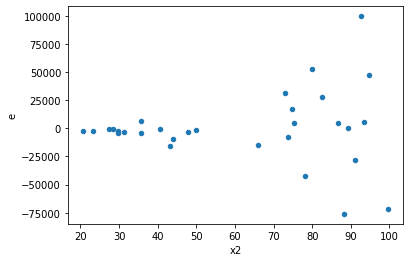

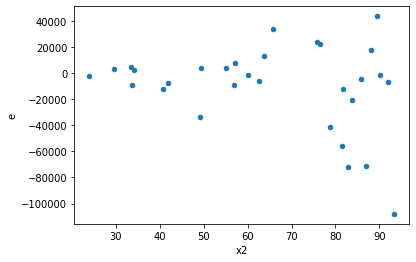

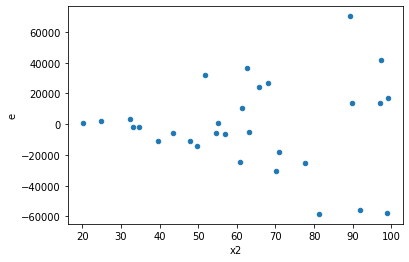

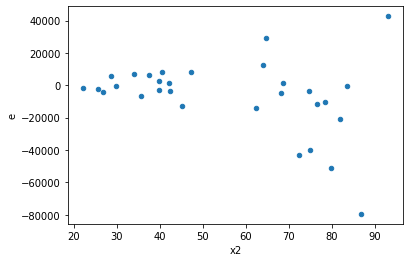

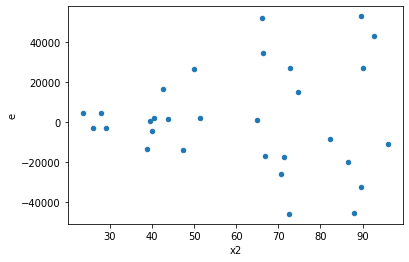

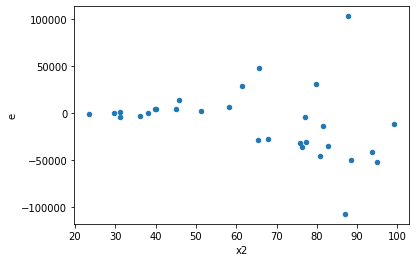

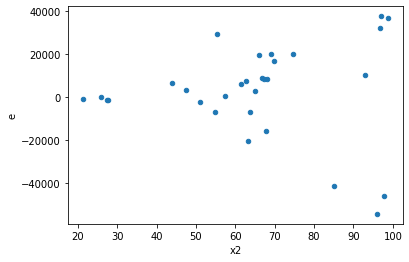

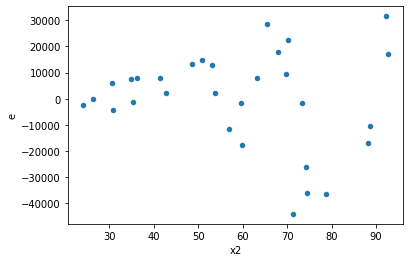

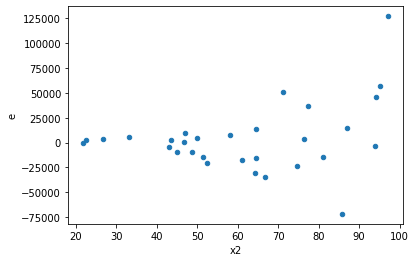

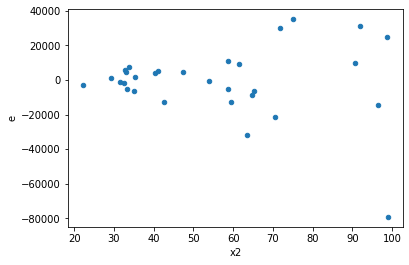

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,9.0,9.0,21240784600.171158,212025833.38656563,2655098075.0213947,26503229.173320703,100.18017267473698,1.2211891231572736e-07,0.9999999389405438,Reject005=0 : Heteroscedasticity
1.0,9.0,9.0,14483883493.136114,1328936577.262653,1810485436.6420143,166117072.15783164,10.898852316165497,0.0014939869130135008,0.9992530065434932,Reject005=0 : Heteroscedasticity
2.0,9.0,9.0,16146992532.79003,603839022.8737983,2018374066.5987537,75479877.85922478,26.740558197022548,3.824590867962385e-05,0.9999808770456602,Reject005=0 : Heteroscedasticity
3.0,9.0,9.0,10432954196.832087,211271884.16072717,1304119274.6040108,26408985.520090897,49.381649802938824,2.734979375862423e-06,0.9999986325103121,Reject005=0 : Heteroscedasticity
4.0,9.0,9.0,10303992898.074928,781376415.0851644,1287999112.259366,97672051.88564555,13.186977107508252,0.0007055020833155456,0.9996472489583422,Reject005=0 : Heteroscedasticity
5.0,9.0,9.0,9661078209.845612,140526072.66737327,1207634776.2307014,17565759.08342166,68.74936463010312,6.42971426989547e-07,0.9999996785142865,Reject005=0 : Heteroscedasticity
6.0,9.0,9.0,9017027699.74954,699929778.3555859,1127128462.4686925,87491222.29444824,12.882760497680401,0.0007741642903860146,0.999612917854807,Reject005=0 : Heteroscedasticity
7.0,9.0,9.0,6829983383.215994,71118819.22683086,853747922.9019992,8889852.403353857,96.03623144293233,1.4722472441164314e-07,0.9999999263876378,Reject005=0 : Heteroscedasticity
8.0,9.0,9.0,17434402210.601856,504000519.69498193,2179300276.325232,63000064.96187274,34.59203220892123,1.275404648848344e-05,0.9999936229767558,Reject005=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,21240784600.171158,212025833.38656563,2655098075.0213947,26503229.173320703,100.18017267473698,1.2211891231572736e-07,Reject005=0 : Heteroscedasticity
1.0,9.0,9.0,14483883493.136114,1328936577.262653,1810485436.6420143,166117072.15783164,10.898852316165497,0.0014939869130135008,Reject005=0 : Heteroscedasticity
2.0,9.0,9.0,16146992532.79003,603839022.8737983,2018374066.5987537,75479877.85922478,26.740558197022548,3.824590867962385e-05,Reject005=0 : Heteroscedasticity
3.0,9.0,9.0,10432954196.832087,211271884.16072717,1304119274.6040108,26408985.520090897,49.381649802938824,2.734979375862423e-06,Reject005=0 : Heteroscedasticity
4.0,9.0,9.0,10303992898.074928,781376415.0851644,1287999112.259366,97672051.88564555,13.186977107508252,0.0007055020833155456,Reject005=0 : Heteroscedasticity
5.0,9.0,9.0,9661078209.845612,140526072.66737327,1207634776.2307014,17565759.08342166,68.74936463010312,6.42971426989547e-07,Reject005=0 : Heteroscedasticity
6.0,9.0,9.0,9017027699.74954,699929778.3555859,1127128462.4686925,87491222.29444824,12.882760497680401,0.0007741642903860146,Reject005=0 : Heteroscedasticity
7.0,9.0,9.0,6829983383.215994,71118819.22683086,853747922.9019992,8889852.403353857,96.03623144293233,1.4722472441164314e-07,Reject005=0 : Heteroscedasticity
8.0,9.0,9.0,17434402210.601856,504000519.69498193,2179300276.325232,63000064.96187274,34.59203220892123,1.275404648848344e-05,Reject005=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    990
Reject005=1 : Homoscedasticity       10
Name: Result_test, dtype: int64